## Importing the libraries

In [64]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import data_acquisition as da

## Getting the training and testing data

In [65]:
# Importing the data through the data_acquisition file
x, y = da.labels_binary()
# Converting the 3 dimensional features to one dimension
for i in range(x.shape[0]):
    x[i] = np.reshape(x[i], (512*512))

In [66]:
# Splitting the data onto a test and a train set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.85, random_state=15) 

## Implementing SVM algorithm from the scikit library

In [67]:
# Creating an SVM algorithm using scikit learn
svc_classifier = svm.SVC(kernel = 'linear')
# Alterntively ssince we are doing linear SVC, LinearSVC() function could also have been used
svc_classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [68]:
# Predicting the outputs using SVM
y_pred = svc_classifier.predict(xtest)

## Getting accuracy results

In [69]:
print(accuracy_score(ytest, pred))

0.9444444444444444


In [70]:
print(classification_report(ytest, y_pred, target_names=['no tumor', 'tumor']))

              precision    recall  f1-score   support

    no tumor       0.80      0.82      0.81        65
       tumor       0.97      0.97      0.97       385

    accuracy                           0.94       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.94      0.94      0.94       450



In [71]:
conf_mat = confusion_matrix(ytest, y_pred, labels=svc_classifier.classes_)

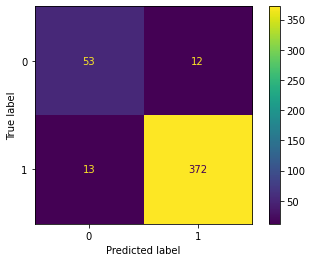

In [72]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=svc_classifier.classes_)
cm_disp.plot()